### 비트코인 가격 예측
**참고**  
처음으로 0에 수렴하는 시차 이후에 상관이 크게 줄어드는 지점이 적절한 차분 횟수이다.  
하지만 일반적인 기준점이므로 실제와 다를 수는 있기 때문에 여러 차분을 시도하여 결정해야한다.

In [4]:
import pandas as pd
import json

with open('./datasets/bitcoin_2010_2024.json') as f:
    json_data = json.load(f)
# 딕셔너리 형태
bitcoin_df = pd.DataFrame(json_data['market-price'])
bitcoin_df

,x,y
0,1230940800000,0.00
1,1231286400000,0.00
2,1231632000000,0.00
3,1231977600000,0.00
4,1232323200000,0.00
...,...,...
1405,1716508800000,67942.23
1406,1716854400000,69374.17
1407,1717200000000,67484.93
1408,1717545600000,70553.24


In [5]:
from datetime import datetime

def changeDate(milis):
    timestamp = milis / 1000
    converted_time = datetime.fromtimestamp(timestamp).strftime('%Y-%m-%d')
    return converted_time

In [7]:
bitcoin_df.x = bitcoin_df.x.apply(changeDate)
bitcoin_df

,x,y
0,2009-01-03,0.00
1,2009-01-07,0.00
2,2009-01-11,0.00
3,2009-01-15,0.00
4,2009-01-19,0.00
...,...,...
1405,2024-05-24,67942.23
1406,2024-05-28,69374.17
1407,2024-06-01,67484.93
1408,2024-06-05,70553.24


In [8]:
bitcoin_df.set_index('x', inplace=True)
bitcoin_df

,y
x,
2009-01-03,0.00
2009-01-07,0.00
2009-01-11,0.00
2009-01-15,0.00
2009-01-19,0.00
...,...
2024-05-24,67942.23
2024-05-28,69374.17
2024-06-01,67484.93


In [9]:
bitcoin_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1410 entries, 2009-01-03 to 2024-06-09
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       1410 non-null   float64
dtypes: float64(1)
memory usage: 22.0+ KB


In [11]:
bitcoin_df.index = pd.to_datetime(bitcoin_df.index)
bitcoin_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1410 entries, 2009-01-03 to 2024-06-09
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       1410 non-null   float64
dtypes: float64(1)
memory usage: 22.0 KB


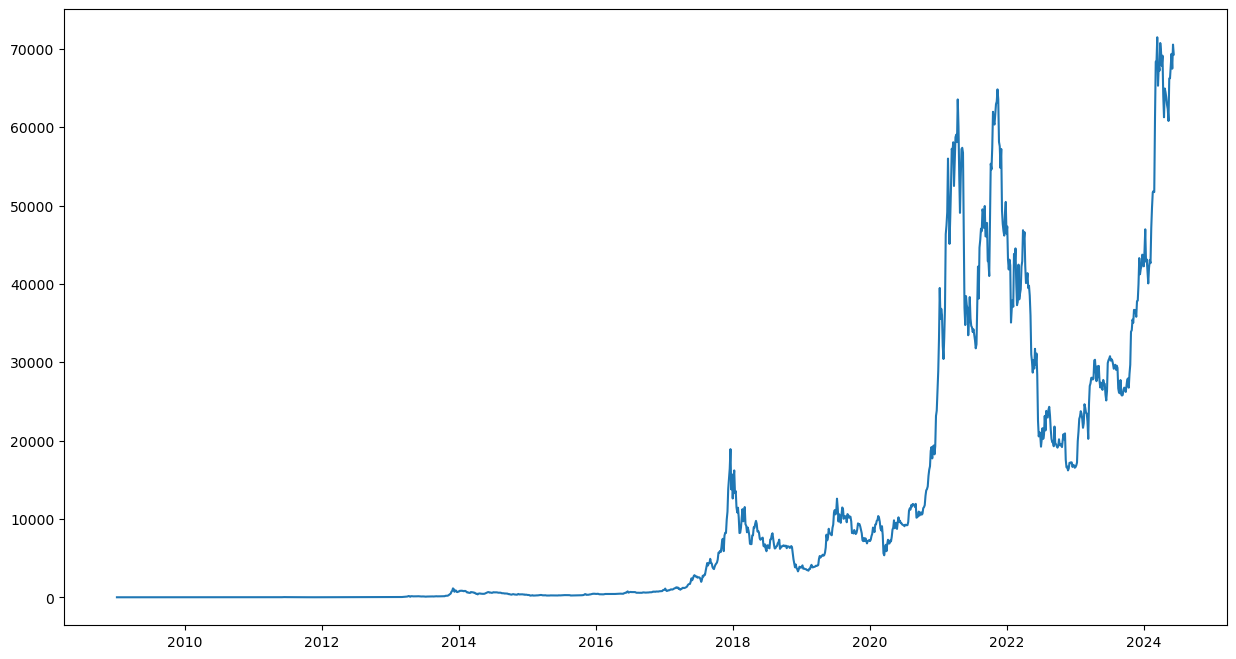

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
plt.plot(bitcoin_df)
plt.show()

In [22]:
b_df = bitcoin_df[~(bitcoin_df.index < '2016-01-01')]
b_df

,y
x,
2016-01-03,432.76
2016-01-07,429.26
2016-01-11,448.43
2016-01-15,429.55
2016-01-19,385.49
...,...
2024-05-24,67942.23
2024-05-28,69374.17
2024-06-01,67484.93


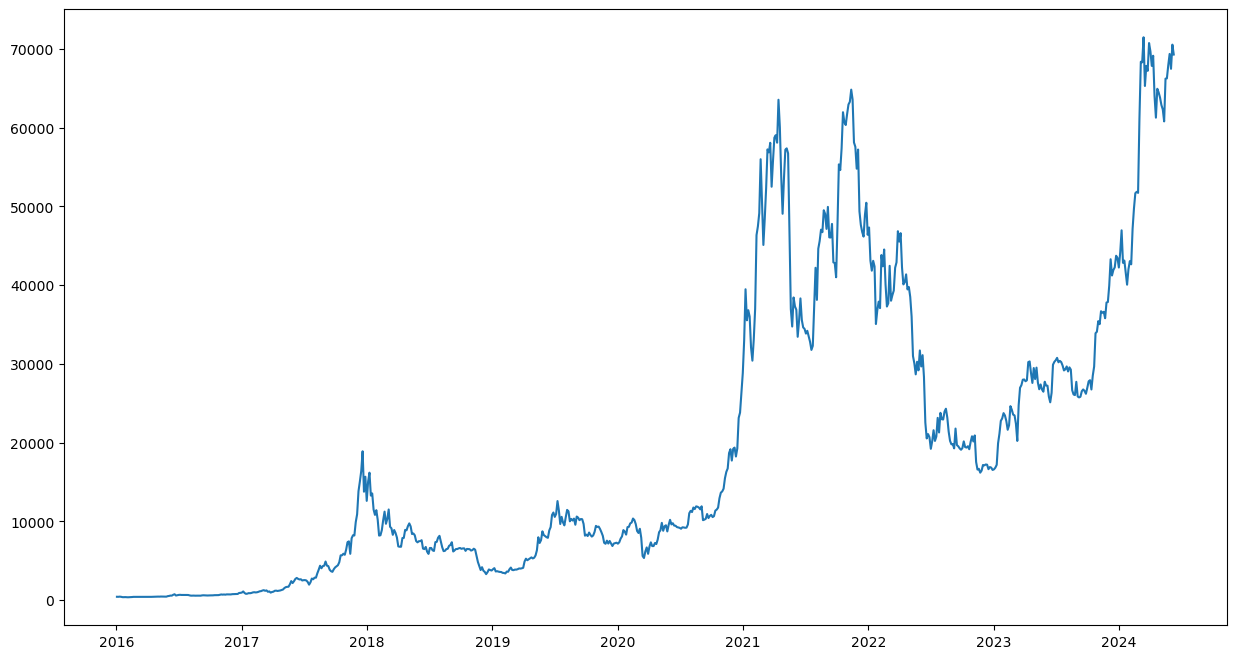

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
plt.plot(b_df)
plt.show()

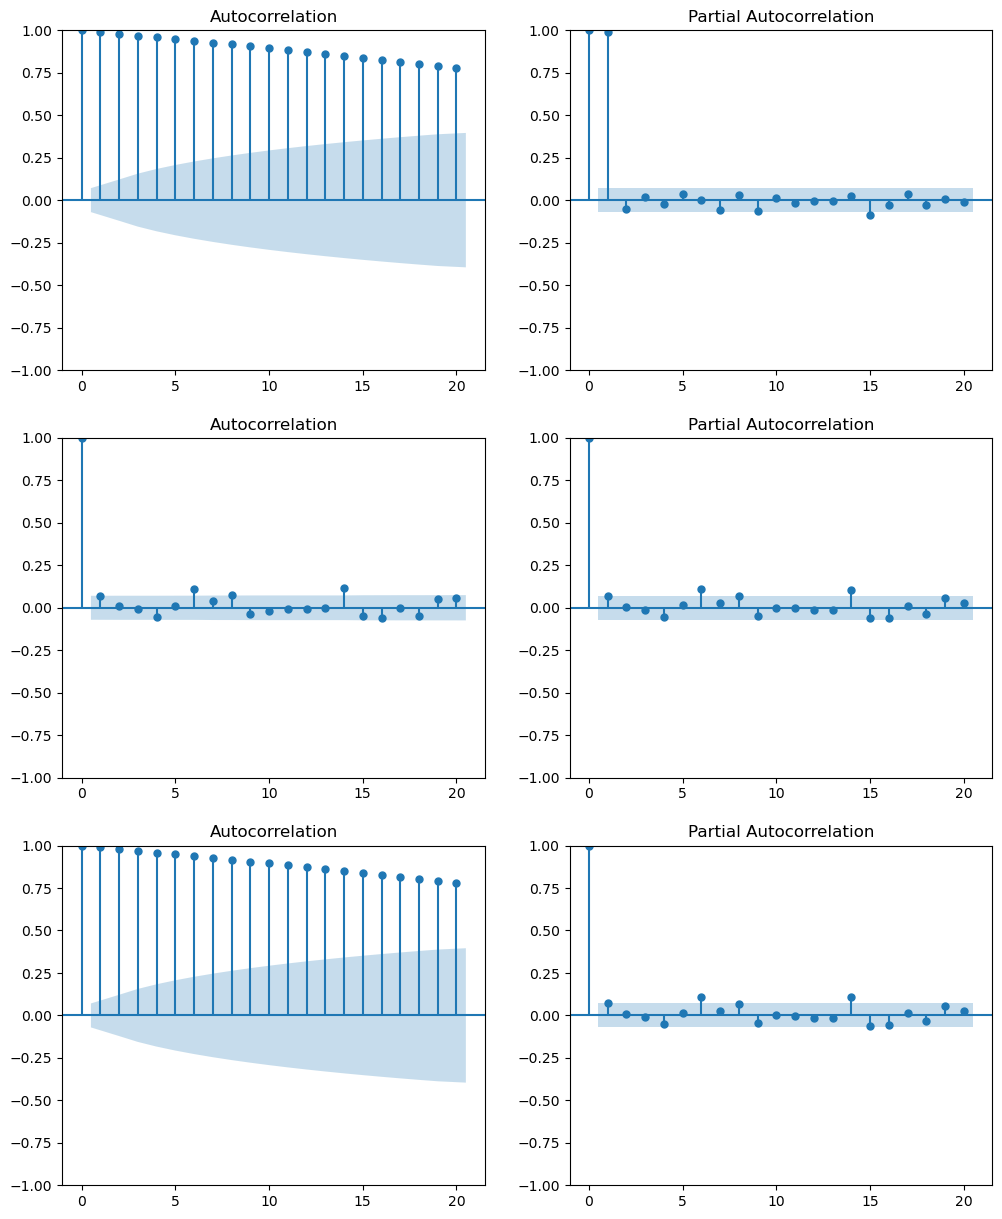

In [25]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(3, 2, figsize=(12, 15))

plot_acf(b_df, lags=20, ax=ax[0][0])
plot_pacf(b_df, lags=20, ax=ax[0][1])

plot_acf(b_df.diff().dropna(), lags=20, ax=ax[1][0])
plot_pacf(b_df.diff().dropna(), lags=20, ax=ax[1][1])

plot_acf(b_df, lags=20, ax=ax[2][0])
plot_pacf(b_df.diff().dropna(), lags=20, ax=ax[2][1])

plt.show()

In [29]:
b_diff_df = b_df.diff()
b_diff_df.dropna(inplace=True)
b_diff_df

,y
x,
2016-01-07,-3.50
2016-01-11,19.17
2016-01-15,-18.88
2016-01-19,-44.06
2016-01-23,-3.99
...,...
2024-05-24,1676.16
2024-05-28,1431.94
2024-06-01,-1889.24


In [32]:
window_size= 10

moving_avg = b_df.rolling(window_size).mean()
print(moving_avg)

moving_avg_diff = b_diff_df.rolling(window_size).mean()
print(moving_avg_diff)

                    y
x                    
2016-01-03        NaN
2016-01-07        NaN
2016-01-11        NaN
2016-01-15        NaN
2016-01-19        NaN
...               ...
2024-05-24  64101.117
2024-05-28  64910.483
2024-06-01  65163.997
2024-06-05  65770.692
2024-06-09  66317.213

[771 rows x 1 columns]
                  y
x                  
2016-01-07      NaN
2016-01-11      NaN
2016-01-15      NaN
2016-01-19      NaN
2016-01-23      NaN
...             ...
2024-05-24  392.249
2024-05-28  809.366
2024-06-01  253.514
2024-06-05  606.695
2024-06-09  546.521

[770 rows x 1 columns]


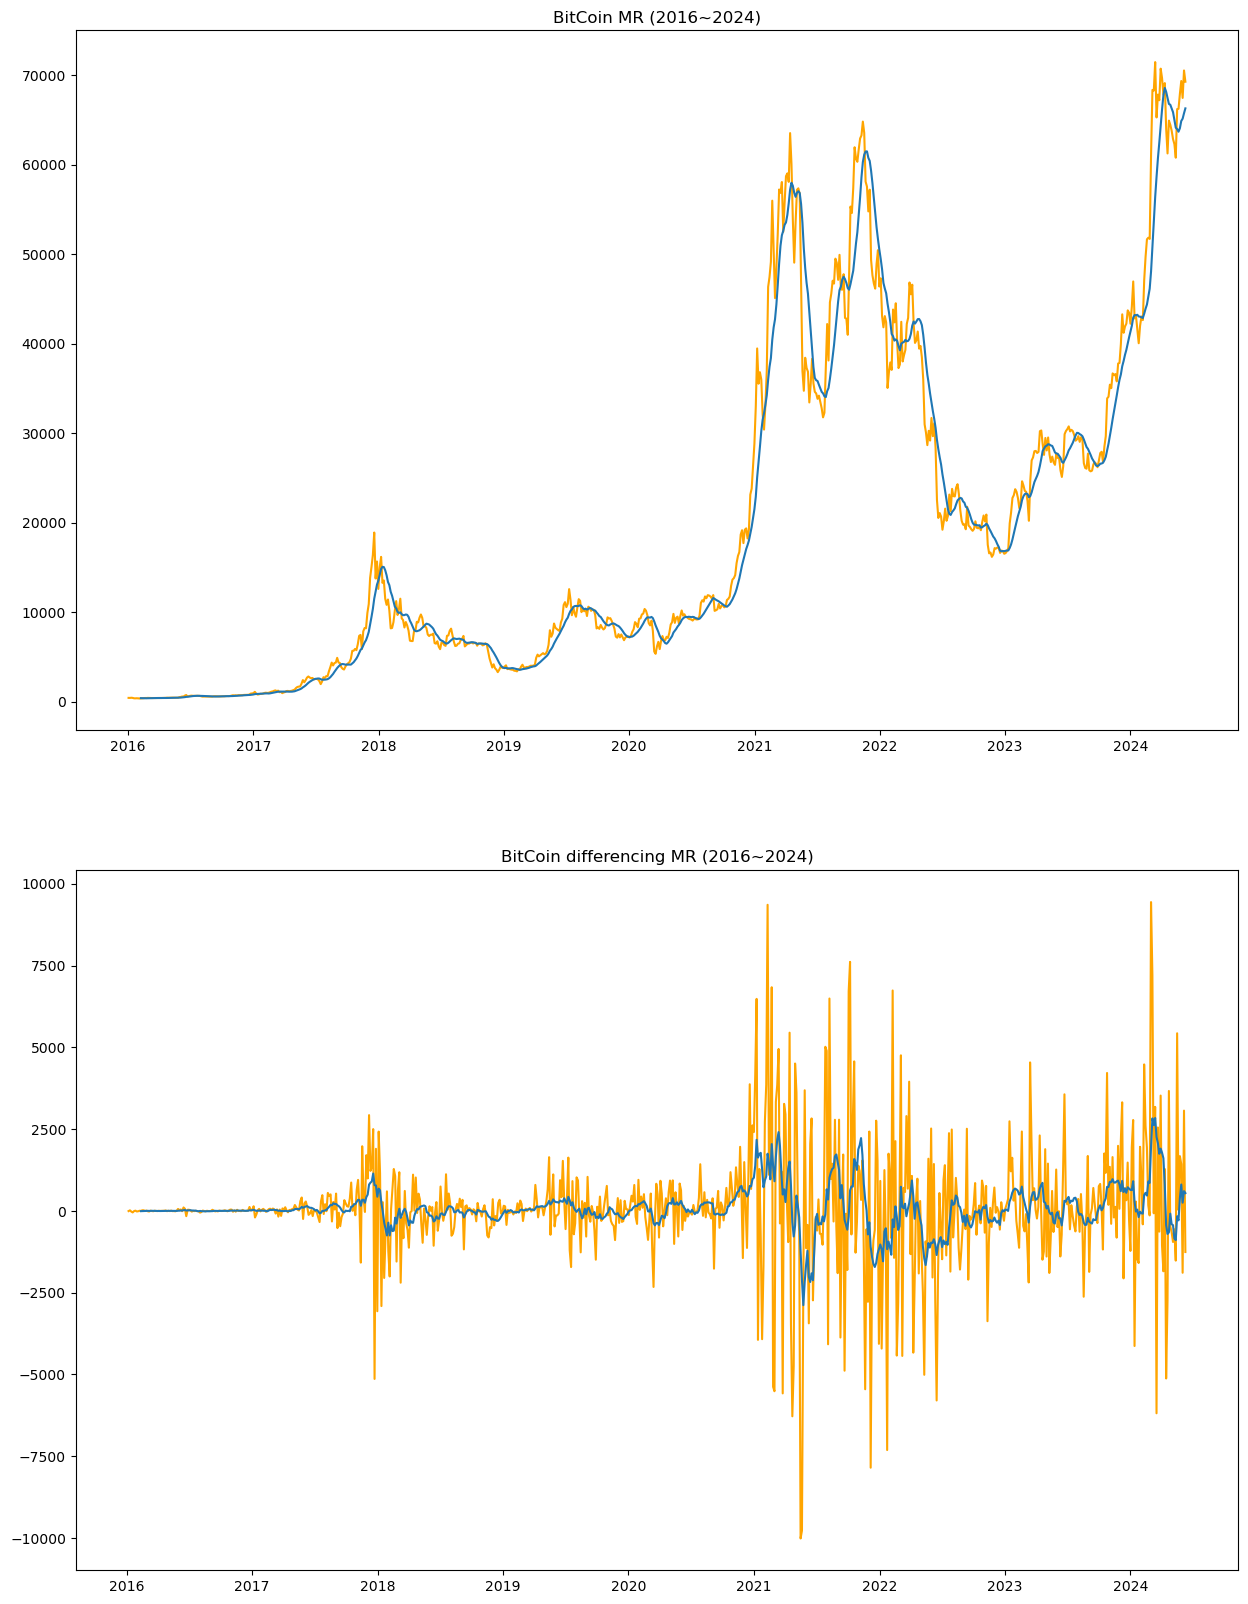

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 20))

plt.subplot(211)
plt.plot(b_df, c='orange')

plt.subplot(211)
plt.plot(moving_avg)
plt.title('BitCoin MR (2016~2024)')

plt.subplot(212)
plt.plot(b_diff_df, c='orange')

plt.subplot(212)
plt.plot(moving_avg_diff)

plt.title('BitCoin differencing MR (2016~2024)')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 4D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 4D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 4D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Ch

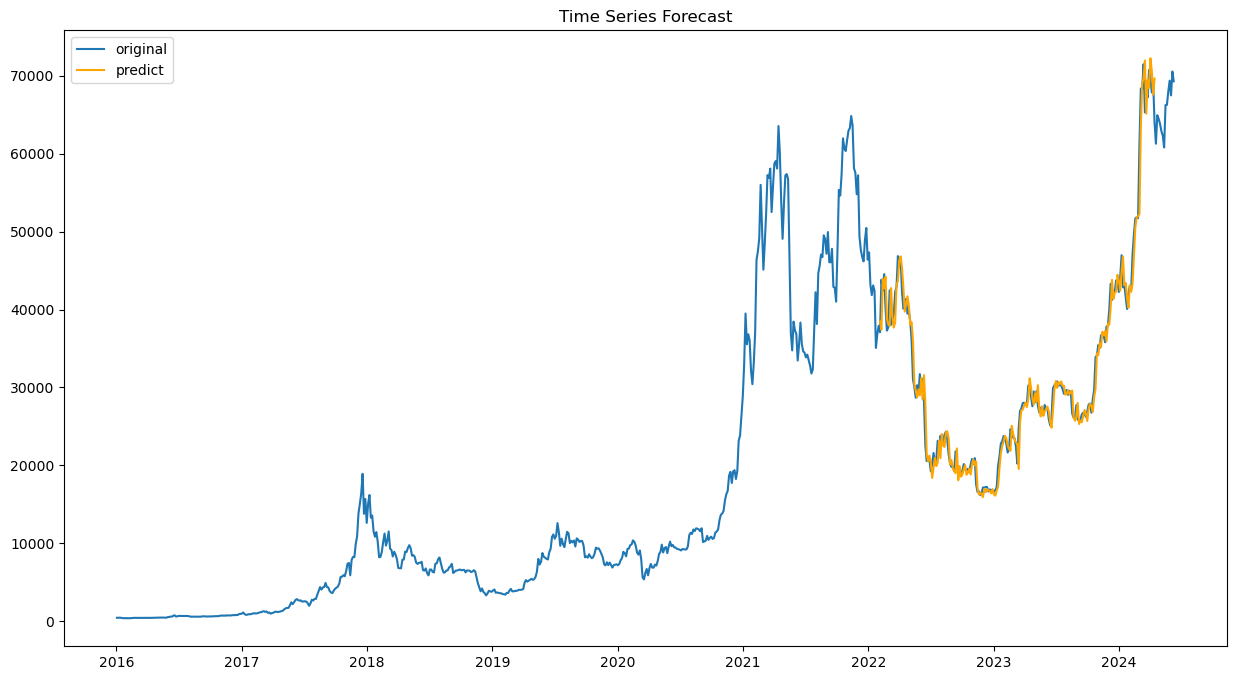

In [45]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd

model = ARIMA(b_df, order=(3, 3, 21))
model_fit = model.fit()

start_index = pd.to_datetime('2022-02-04')
end_index = pd.to_datetime('2024-04-14')

forecast = model_fit.predict(start=start_index, end=end_index)

plt.figure(figsize=(15, 8))
plt.plot(b_df, label='original')
plt.plot(forecast, label='predict', c='orange')
plt.title('Time Series Forecast')
plt.legend()
plt.show()

In [46]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error

mse = mean_squared_error(b_df['2022-02-04':'2024-04-14'], forecast)
print("Mean Squared Error", mse)

msle = mean_squared_log_error(b_df['2022-02-04':'2024-04-14'], forecast)
print("Mean Squared Log Error", msle)

Mean Squared Error 3864930.0427504955
Mean Squared Log Error 0.0035240683316763257
